# Week 12 Homework - Imputing Data

Each XLS or XLSX file contains a dataframe.  
* Load each XLS or XLSX file in your Jupyter notebook.  For each dataframe, address missing values by taking the following steps:

1. Count the number of missing values in the dataframe; count the number of missing values per column
1. Plot the distribution of data points using a histogram
1. Create a lag plot (a lag plot shows t versus t+1)
1. Based on the lag plot, state in a markdown cell whether the order of this data matters. 
1. Do one of the following (not both):
    1. If the order of the data matters, then interpolate the missing values
    1. If the order of the data does not matter, fill in the missing data by sampling from the distribution
    1. Create a scatter plot using the columns in dataframe; no Nan entries should be present Submit a single Jupyter notebook with your analysis of the XLS and XLSX files.
    1. Perform interpolation or sampling programmatically using Python (not manually)

### Loading files

In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.3.4'

In [3]:
df_12 = pd.read_excel("/Users/dakshintwala/github_temp/homework/imputation_homework_12.xlsx") 
df_78 = pd.read_excel("/Users/dakshintwala/github_temp/homework/imputation_homework_78.xlsx")
df_32 = pd.read_excel("/Users/dakshintwala/github_temp/homework/imputation_homework_32.xls")

### Counting No. of Missing Values

In [4]:
def count_missing(dataset, dataset_name):
    count=[]
    print(f"\n\nNumber of missing values in columns of '{dataset_name}'")
    for i in dataset.columns:
        null_v = dataset[i].isna().sum()
        count.append((i,null_v))
    count_data= pd.DataFrame(columns=["column_name", "missing_value_counts"], data = count)
    return count_data

In [5]:
df_12_ncounts = count_missing(df_12, "imputation_homework_12.xlsx")
display(df_12_ncounts)

df_32_ncounts = count_missing(df_32,"imputation_homework_32.xls")
display(df_32_ncounts)

df_78_ncounts = count_missing(df_78,"imputation_homework_78.xlsx")
display(df_78_ncounts)



Number of missing values in columns of 'imputation_homework_12.xlsx'


,column_name,missing_value_counts
0,Unnamed: 0,0
1,x,9
2,y,0




Number of missing values in columns of 'imputation_homework_32.xls'


,column_name,missing_value_counts
0,Unnamed: 0,0
1,time,0
2,value,48




Number of missing values in columns of 'imputation_homework_78.xlsx'


,column_name,missing_value_counts
0,Unnamed: 0,0
1,date,0
2,value,81


### Plotting distribution of datapoints

In [6]:
import matplotlib.pyplot as plt

In [7]:
def plt_dis_hist(df, df_name):
    print('\033[1m'+f"\nHistogram plot of dataset : '{df_name}'"+'\033[0m')
    for i in df.columns[1:]:
        plt.hist(df[i], rwidth=.9)
        plt.xlabel(f"Datapoints of {i}")
        plt.xticks(rotation=30)
        plt.ylabel("Frequency of Datapoints")
        plt.title(f"Plotting datapoints of Column: {i}")
        plt.show()


Histogram plot of dataset : 'df_12'


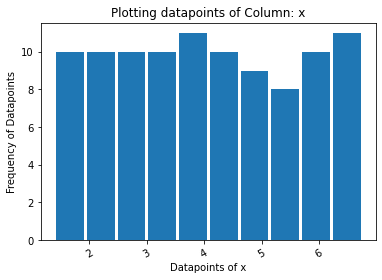

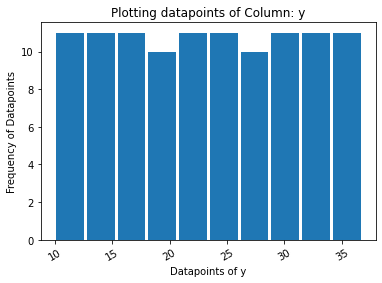


Histogram plot of dataset : 'df_32'


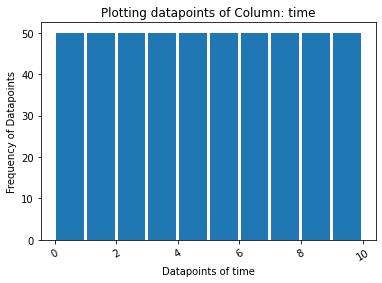

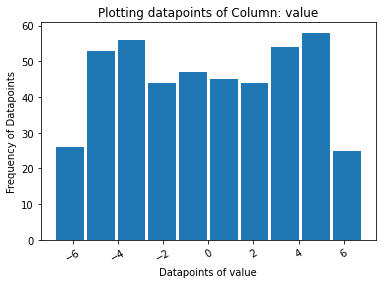


Histogram plot of dataset : 'df_78'


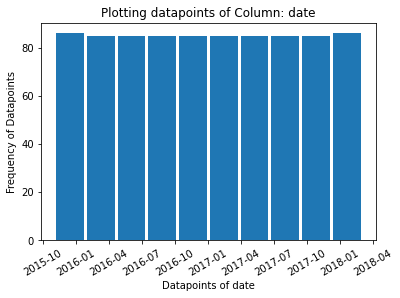

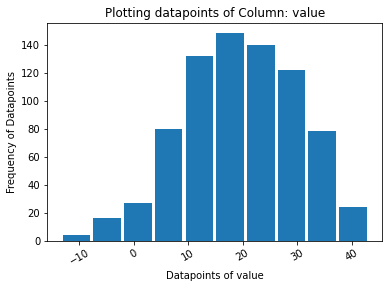

In [8]:
plt_dis_hist(df_12, 'df_12')
plt_dis_hist(df_32, 'df_32')
plt_dis_hist(df_78, 'df_78')

The 'value' column of df_78 follows Normal Distribution

### Lag PLot

In [9]:
def lag_plt(df, df_name):
    print('\033[1m'+f"\nLag plot of dataset : '{df_name}'"+'\033[0m')
    for i in df.columns[1:]:
        pd.plotting.lag_plot(df[i])
        plt.xticks(rotation=30)
        plt.title(f"LagPlot of Column: {i}")
        plt.show()


Lag plot of dataset : 'df_12'


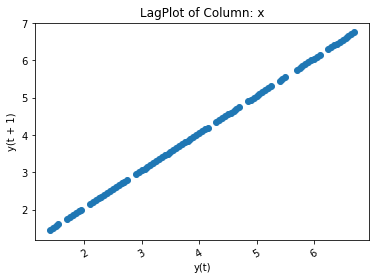

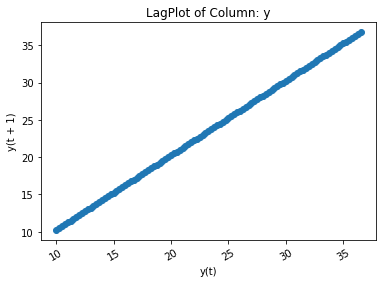

In [10]:
lag_plt(df_12, 'df_12')

Here order of x doesn matter as the lagplot of x shows an upward linear trend, so we will interpolate the missing values of x.


Lag plot of dataset : 'df_32'


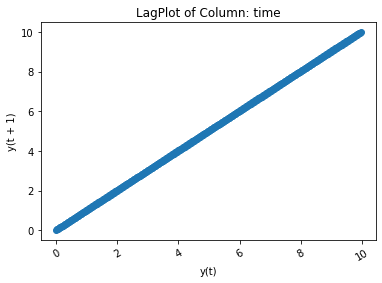

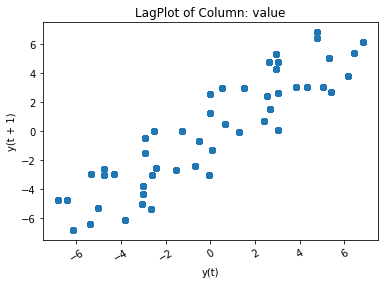

In [11]:
lag_plt(df_32, 'df_32')

Here the lag plot of value shows an upwards linear trend, which indicates that order matters. Therefore, we will interpolate the missing values of 'value' column


Lag plot of dataset : 'df_78'


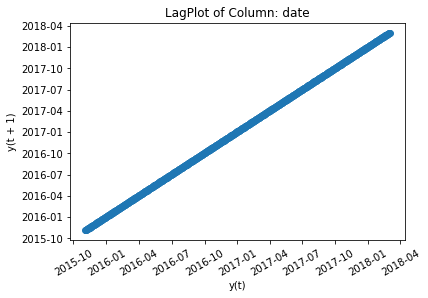

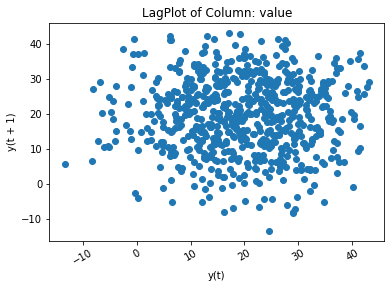

In [12]:
lag_plt(df_78, 'df_78')

Here the order of value doesn't matters as a blob stucture is seen that signifies nothing. So we will fill missing values with sampling from the normal distribution.

### Filling the missing values

### Interpolating null values whose order matters: (df_12, x-column) & (df_32, value-column)

In [13]:
from scipy.interpolate import interp1d

In [14]:
df_12['x']=df_12['x'].interpolate()

In [15]:
df_32['value']=df_32['value'].interpolate()

### Sampling null values whose order doesn't matters: (df_78, value-column) Normal Distribution

In [16]:
import numpy as np

In [17]:
indexes = list(df_78.index[df_78['value'].isna()])
for i in indexes:
    fill_na = np.random.normal(loc= df_78['value'].mean(), scale = df_78['value'].std(), size=1)
    df_78.at[i,'value'] = fill_na


### Checking null values filled or not

In [18]:
df_78['value'].isna().sum()

0

In [19]:
df_32['value'].isna().sum()

0

In [20]:
df_12['x'].isna().sum()

0

### Creating Scatter plots

In [21]:
import matplotlib

In [22]:
def scatter_plt(df, title):
    plt.scatter(x=df[df.columns[1]], y=df[df.columns[2]], alpha=.5)
    plt.xlabel(df.columns[1])
    plt.ylabel(df.columns[2])
    plt.title(title)
    
    plt.show()

### imputation_homework_12.xlsx

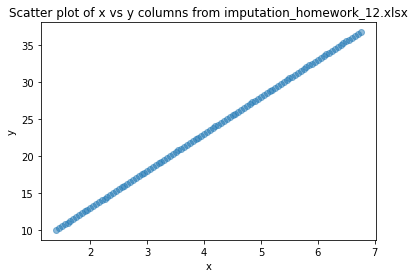

In [23]:
scatter_plt(df_12, "Scatter plot of x vs y columns from imputation_homework_12.xlsx")

The x vs y have linear relation in file imputation_homework_12  following y= mx +c 

### imputation_homework_32.xls

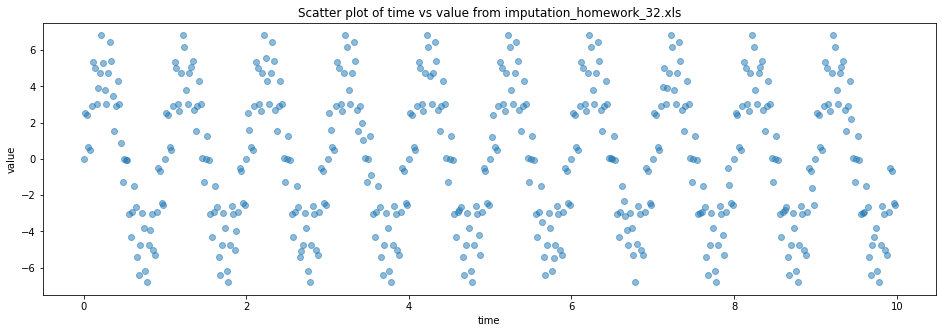

In [24]:
plt.figure(figsize=(16,5))
scatter_plt(df_32, "Scatter plot of time vs value from imputation_homework_32.xls")

### Smooth curve to understand the pattern, savgol filter applied.

In [25]:
from scipy.signal import savgol_filter
yhat = savgol_filter(df_32['value'], 51, 3)

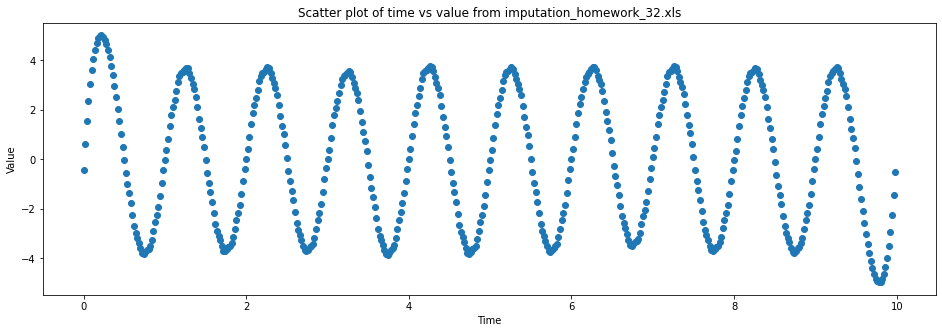

In [26]:
plt.figure(figsize=(16,5))
plt.scatter(x=df_32['time'], y=yhat)
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Scatter plot of time vs value from imputation_homework_32.xls")
plt.show()

The time vs value in imputation_homework_32 follows sinusoidal relation. 

### imputation_homework_78.xlsx

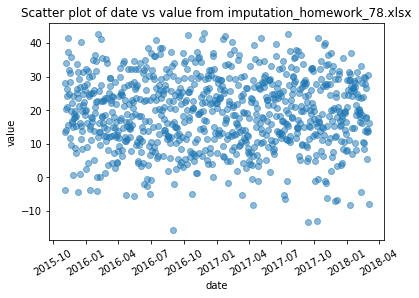

In [27]:
plt.xticks(rotation=30)
scatter_plt(df_78, "Scatter plot of date vs value from imputation_homework_78.xlsx")

No specific relation is observed in imputation_homework_32.xls

Reference:

    1. https://stackoverflow.com/questions/8924173/how-to-print-bold-text-in-python
    2. https://www.analyticsvidhya.com/blog/2021/06/power-of-interpolation-in-python-to-fill-missing-values/
    3. https://stackoverflow.com/questions/53104625/pandas-fill-in-missing-values-choosing-values-from-a-normal-distribution
    4. https://www.askpython.com/python-modules/pandas/update-the-value-of-a-row-dataframe
    5. https://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-in-the-right-way
    